In [1]:
#export 
suppressMessages(source("exp/nb_05.R"))

Warning message:
“package ‘survival’ was built under R version 4.1.1”


In [2]:
#export
library("ggsci")
library("ggridges")

### Helper functions

In [3]:
#export
read_metalearners = function(type, df_names){
    mls = vector("list", length(df_names))
    for (i in 1:length(df_names)){
        filename = paste(data_path,"metalearners_",type,"_",df_names[[i]],".rds", sep="")
        print(filename)
        mls[[i]] = readRDS(filename)
    }
    mls
}

In [4]:
#export
rep_df_names = function(dfs, n = 100, number_of_metalearners = 9){
    name_numb_pats = map(dfs, function(df) dim(df[[1]])[1])
    df_names = vector("list", length(dfs))
    for(i in 1:length(dfs)){
        df_names[[i]] = rep(names(name_numb_pats)[[i]], (n*number_of_metalearners))
    }
    df_names  
}

In [5]:
#export
get_stats_df = function(metalearner, index){
    c_indices = bind_rows(map(1:length(metalearner), function(i) get_c_index_for_algs(metalearner[[i]]$resamplers)))
    c_indices = c_indices %>% gather(Learner, Cindex)

    df = cbind(rep(paste0("Random ", index), length(metalearner)), c_indices )
    colnames(df) = c("Dataset", colnames(c_indices))
    df
}

In [6]:
#export
get_stats = function(MLS, n){
    df_names = unlist(rep_df_names(dfs, n = n))
    stats = bind_rows(map2(MLS,1:length(MLS), get_stats_df))
    stats = cbind(df_names, stats)
    names(stats) = c("Dataset", "Selection", "Learner", "C_Index")
    stats
}

### Results

In [7]:
dfs = readRDS(paste(data_path,"dfs_random.rds", sep=""))

In [8]:
df_names = names(dfs)

## Random

In [14]:
#export
data_path = "../data/metalearners/"

In [15]:
type = "random"

In [16]:
MLS = read_metalearners(type, df_names)

[1] "../data/metalearners/metalearners_random_METABRIC.rds"
[1] "../data/metalearners/metalearners_random_GSE11121.rds"
[1] "../data/metalearners/metalearners_random_GSE96058.rds"
[1] "../data/metalearners/metalearners_random_GSE7390.rds"
[1] "../data/metalearners/metalearners_random_GSE9893.rds"
[1] "../data/metalearners/metalearners_random_NKI.rds"
[1] "../data/metalearners/metalearners_random_TCGA.rds"
[1] "../data/metalearners/metalearners_random_GSE4922.rds"


In [17]:
stats = get_stats(MLS, n=100)

Picking joint bandwidth of 0.0155



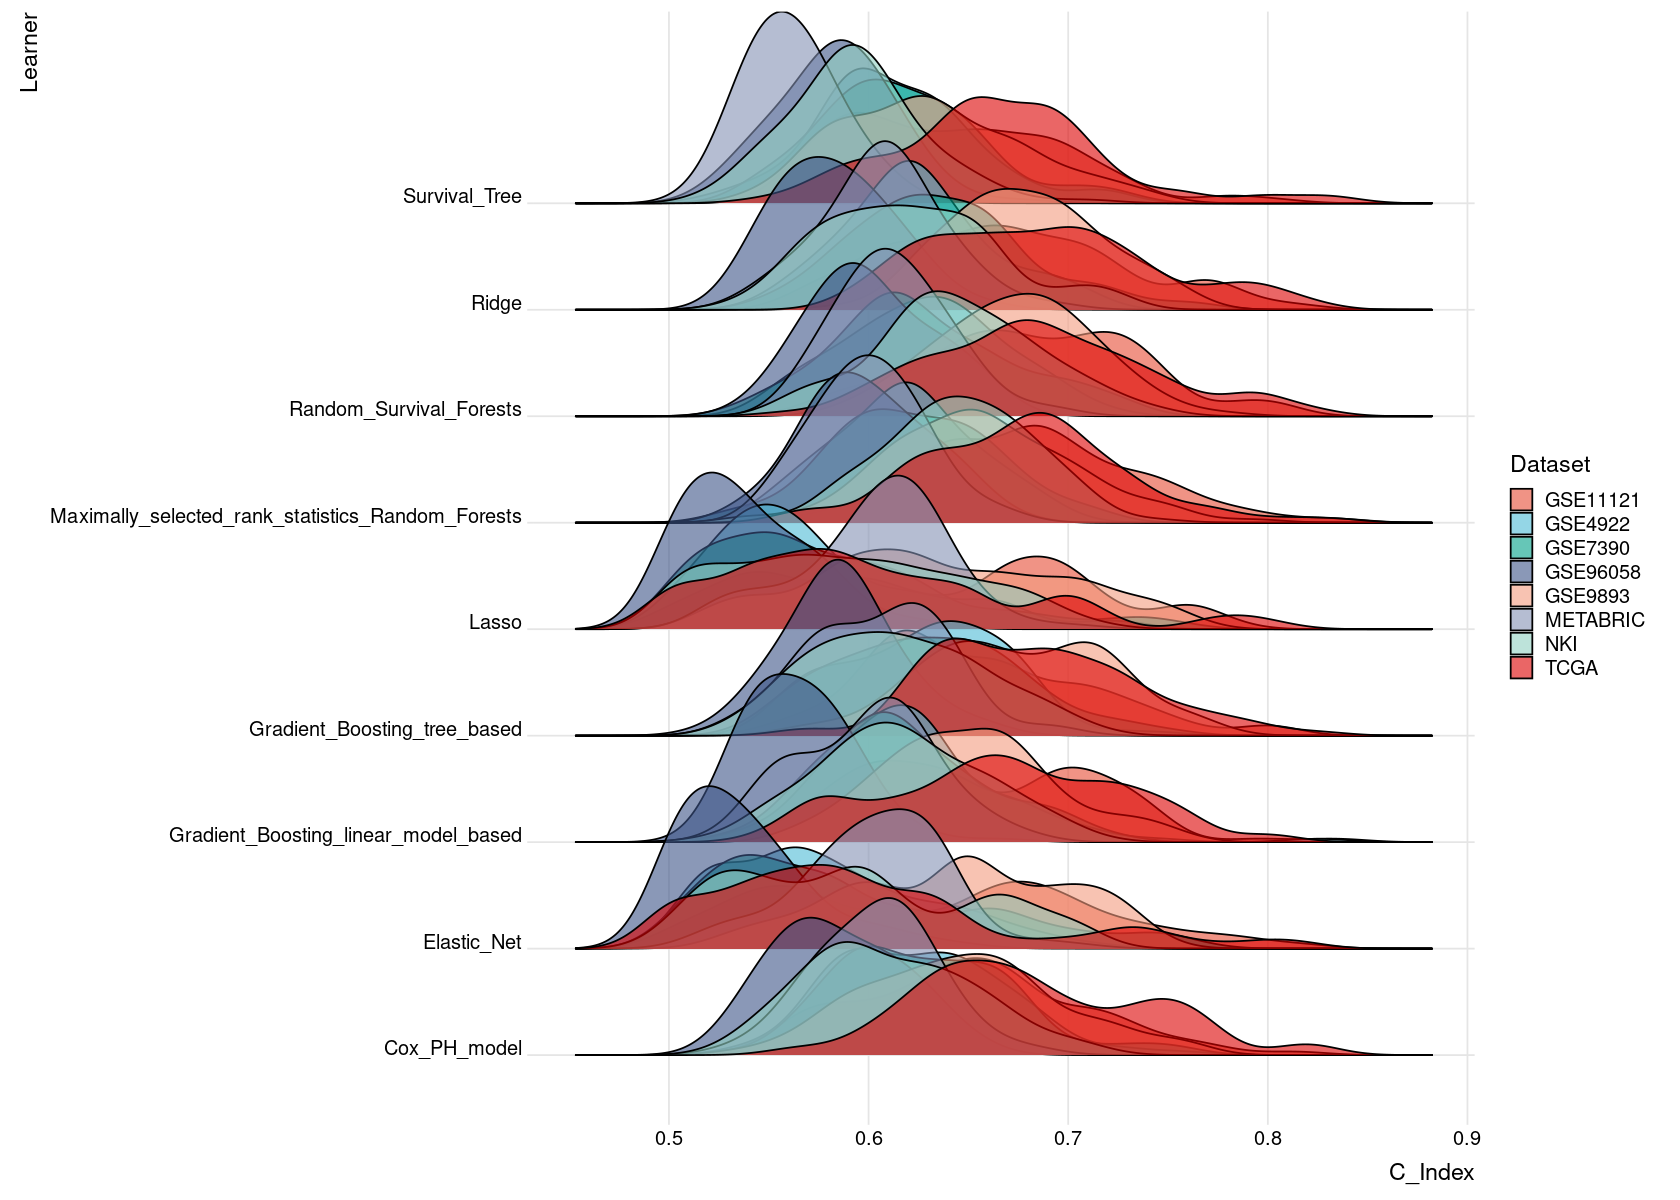

In [18]:
ggplot(stats, aes(x = C_Index, y = Learner, fill = Dataset)) + 
       geom_density_ridges() +
       theme_ridges() + 
       #theme(legend.position = "none")+
       scale_fill_npg(alpha=0.6)

## Known signatures

In [19]:
MLS_signatures = read_metalearners("signatures", df_names)

[1] "../data/metalearners/metalearners_signatures_METABRIC.rds"
[1] "../data/metalearners/metalearners_signatures_GSE11121.rds"
[1] "../data/metalearners/metalearners_signatures_GSE96058.rds"
[1] "../data/metalearners/metalearners_signatures_GSE7390.rds"
[1] "../data/metalearners/metalearners_signatures_GSE9893.rds"
[1] "../data/metalearners/metalearners_signatures_NKI.rds"
[1] "../data/metalearners/metalearners_signatures_TCGA.rds"
[1] "../data/metalearners/metalearners_signatures_GSE4922.rds"


In [20]:
stats_signatures = get_stats(MLS_signatures, n = 33)

Picking joint bandwidth of 0.0221



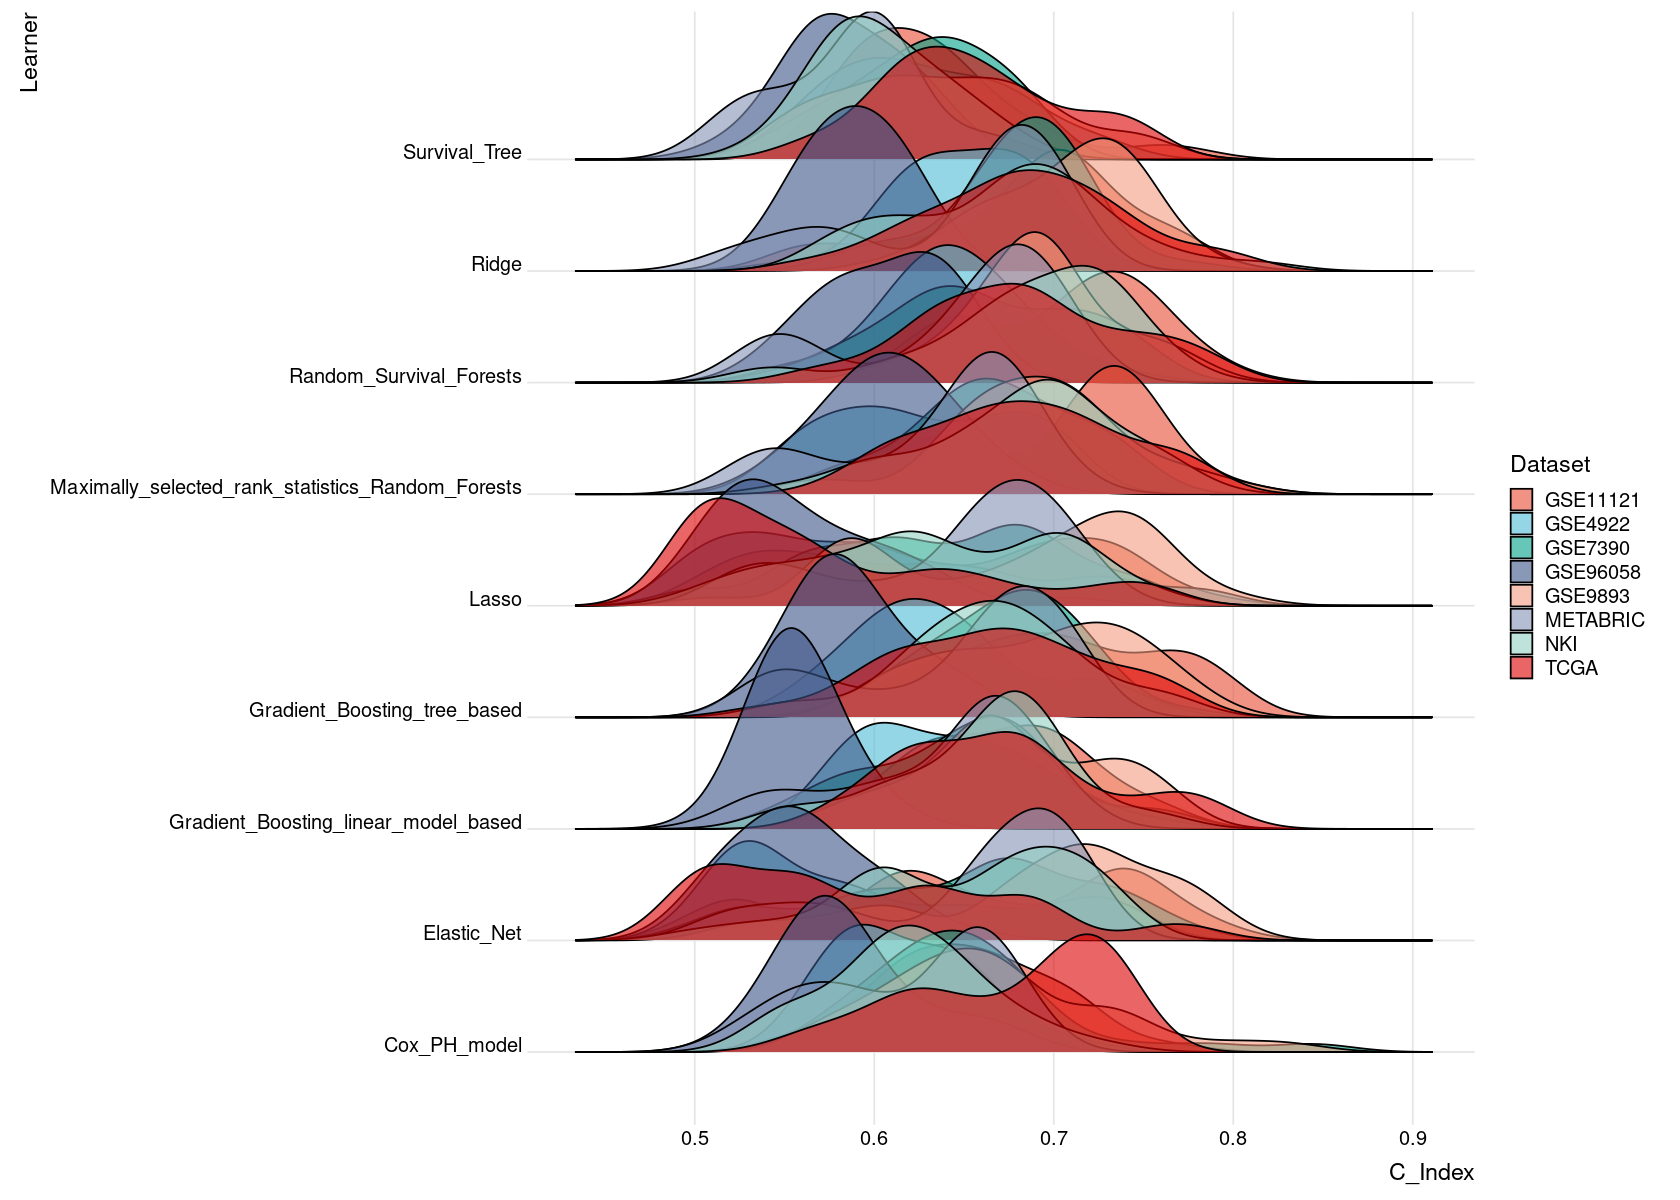

In [25]:
ggplot(stats_signatures, aes(x = C_Index, y = Learner, fill = Dataset)) + 
       geom_density_ridges() +
       #geom_density_ridges(stat = "binline", bins = 10) +
       theme_ridges() + 
       scale_fill_npg(alpha=0.6)

## State-of-the-art

In [26]:
MLS_sota = read_metalearners("feature_selections", df_names)

[1] "../data/metalearners/metalearners_feature_selections_METABRIC.rds"
[1] "../data/metalearners/metalearners_feature_selections_GSE11121.rds"
[1] "../data/metalearners/metalearners_feature_selections_GSE96058.rds"
[1] "../data/metalearners/metalearners_feature_selections_GSE7390.rds"
[1] "../data/metalearners/metalearners_feature_selections_GSE9893.rds"
[1] "../data/metalearners/metalearners_feature_selections_NKI.rds"
[1] "../data/metalearners/metalearners_feature_selections_TCGA.rds"
[1] "../data/metalearners/metalearners_feature_selections_GSE4922.rds"


In [27]:
stats_sota = get_stats(MLS_sota, n = 7)

### Suppl

- Man kann sich täuschen -> über Schallmauer -> appendix
- Wenn funkt, dann muss in anderen clinics funken  
- bewusst geplant! -> egal an was man trainiert

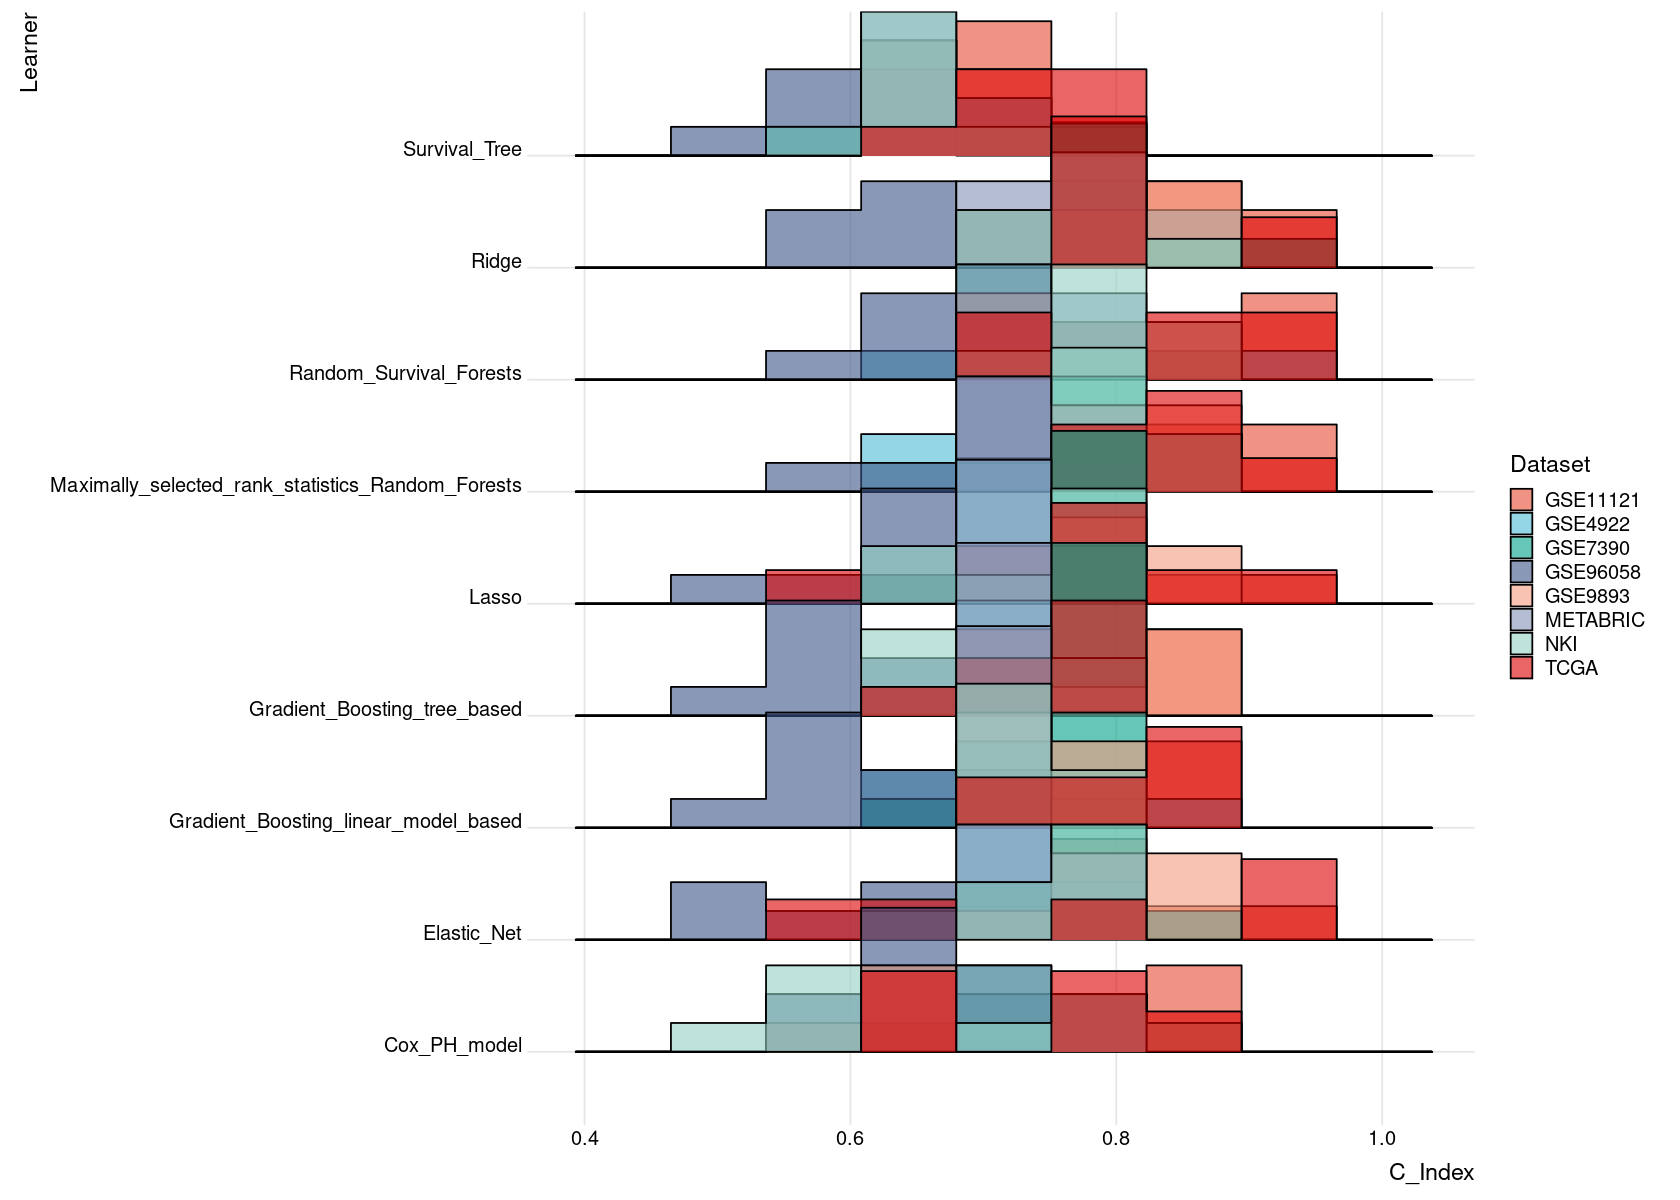

In [30]:
ggplot(stats_sota, aes(x = C_Index, y = Learner, fill = Dataset)) + 
 #      geom_density_ridges() +       
       geom_density_ridges(stat = "binline", bins = 7) +
       theme_ridges() + 
       scale_fill_npg(alpha=0.6)

## Tmp

In [3]:
##export
#feature_selections = c("Univariable_cox_filter",
#                  "RSF_variable_importance", "RSF_minimal_depth", "RSF_variable_hunting",
#                  "MSRS_RF_variable_importance", "mRMR", "SIS")

In [4]:
#stats_sota$Selection = rep(feature_selections, times = dim(stats_sota)[1]/length(feature_selections))

In [5]:
#tmp = stats_sota %>% arrange(desc(C_Index))

In [6]:
#tmp[1:100,]

In [7]:
#tmp[tmp$Dataset=="METABRIC",]

## Tmp 2

In [101]:
path = "../data/metalearners/metalearners_from_feature_selections/"

In [25]:
read_metalearners_from_file_list = function(file_list){
    mls = vector("list", length(file_list))
    for (i in 1:length(file_list)){
        filename = file_list[[i]]
        #print(filename)
        mls[[i]] = readRDS(filename)
    }
    mls
}

### Metabric

In [102]:
file_names = list.files(path, pattern = "METABRIC", full.names=TRUE)

In [103]:
file_names_red = list.files(path, pattern = "METABRIC", full.names=FALSE)

In [104]:
mls_mb = read_metalearners_from_file_list(file_names)

In [105]:
length(mls_mb)

[1] 34

In [106]:
ml = mls_mb[[1]]

In [107]:
c_indices = map(mls_mb, get_c_index)
length(c_indices)

[1] 34

In [108]:
c_indices_df = as.data.frame(unlist(file_names_red))
names(c_indices_df) = c("file_name")
c_indices_df$C_index = as.numeric(c_indices) 

In [109]:
find_models = function(vec){
    out = vec
    models = c("Cox_PH_model",                                     
             "Ridge",                                            
             "Elastic_Net",                                      
             "Lasso",                                            
             "Gradient_Boosting_tree_based",                     
             "Gradient_Boosting_linear_model_based",             
             "Random_Survival_Forests",                          
             "Maximally_selected_rank_statistics_Random_Forests",
             "Survival_Tree")
    for (i in 1:length(models)){
        out[grep(models[[i]], vec)] = models[[i]]
    }
    return(out)
    
}

In [110]:
c_indices_df$model = find_models(c_indices_df$file_name)

In [111]:
head(c_indices_df)

,file_name,C_index,model
,<chr>,<dbl>,<chr>
1,ml_METABRIC_Cox_PH_model_mrmr.rds,0.7072102,Cox_PH_model
2,ml_METABRIC_Cox_PH_model_party_cforest_importance.rds,0.6772900,Cox_PH_model
3,ml_METABRIC_Cox_PH_model_randomForestSRC_importance.rds,0.6532634,Cox_PH_model
4,ml_METABRIC_Cox_PH_model_randomForestSRC_var_select_md.rds,0.6074353,Cox_PH_model
5,ml_METABRIC_Cox_PH_model_randomForestSRC_var_select_vh.rds,0.6625526,Cox_PH_model
6,ml_METABRIC_Elastic_Net_mrmr.rds,0.7230103,Elastic_Net


In [112]:
max(c_indices_df$C_index, na.rm=T)

[1] 0.7254809

In [113]:
c_indices_df$C_index

[1] 0.7072102 0.6772900 0.6532634 0.6074353 0.6625526 0.7230103 0.6915256
 [8] 0.6744137 0.6501050 0.6406592 0.7016399 0.6919263 0.6104741 0.5822901
[15] 0.7241408 0.6820102 0.6969781 0.6476225 0.6431264 0.6999463 0.6946659
[22] 0.6774046 0.6178922 0.6378875 0.7100130 0.7006756 0.6951455 0.6234333
[29] 0.6091138 0.7254809 0.6934530 0.7050391 0.6075038 0.6189269

Picking joint bandwidth of 0.0263



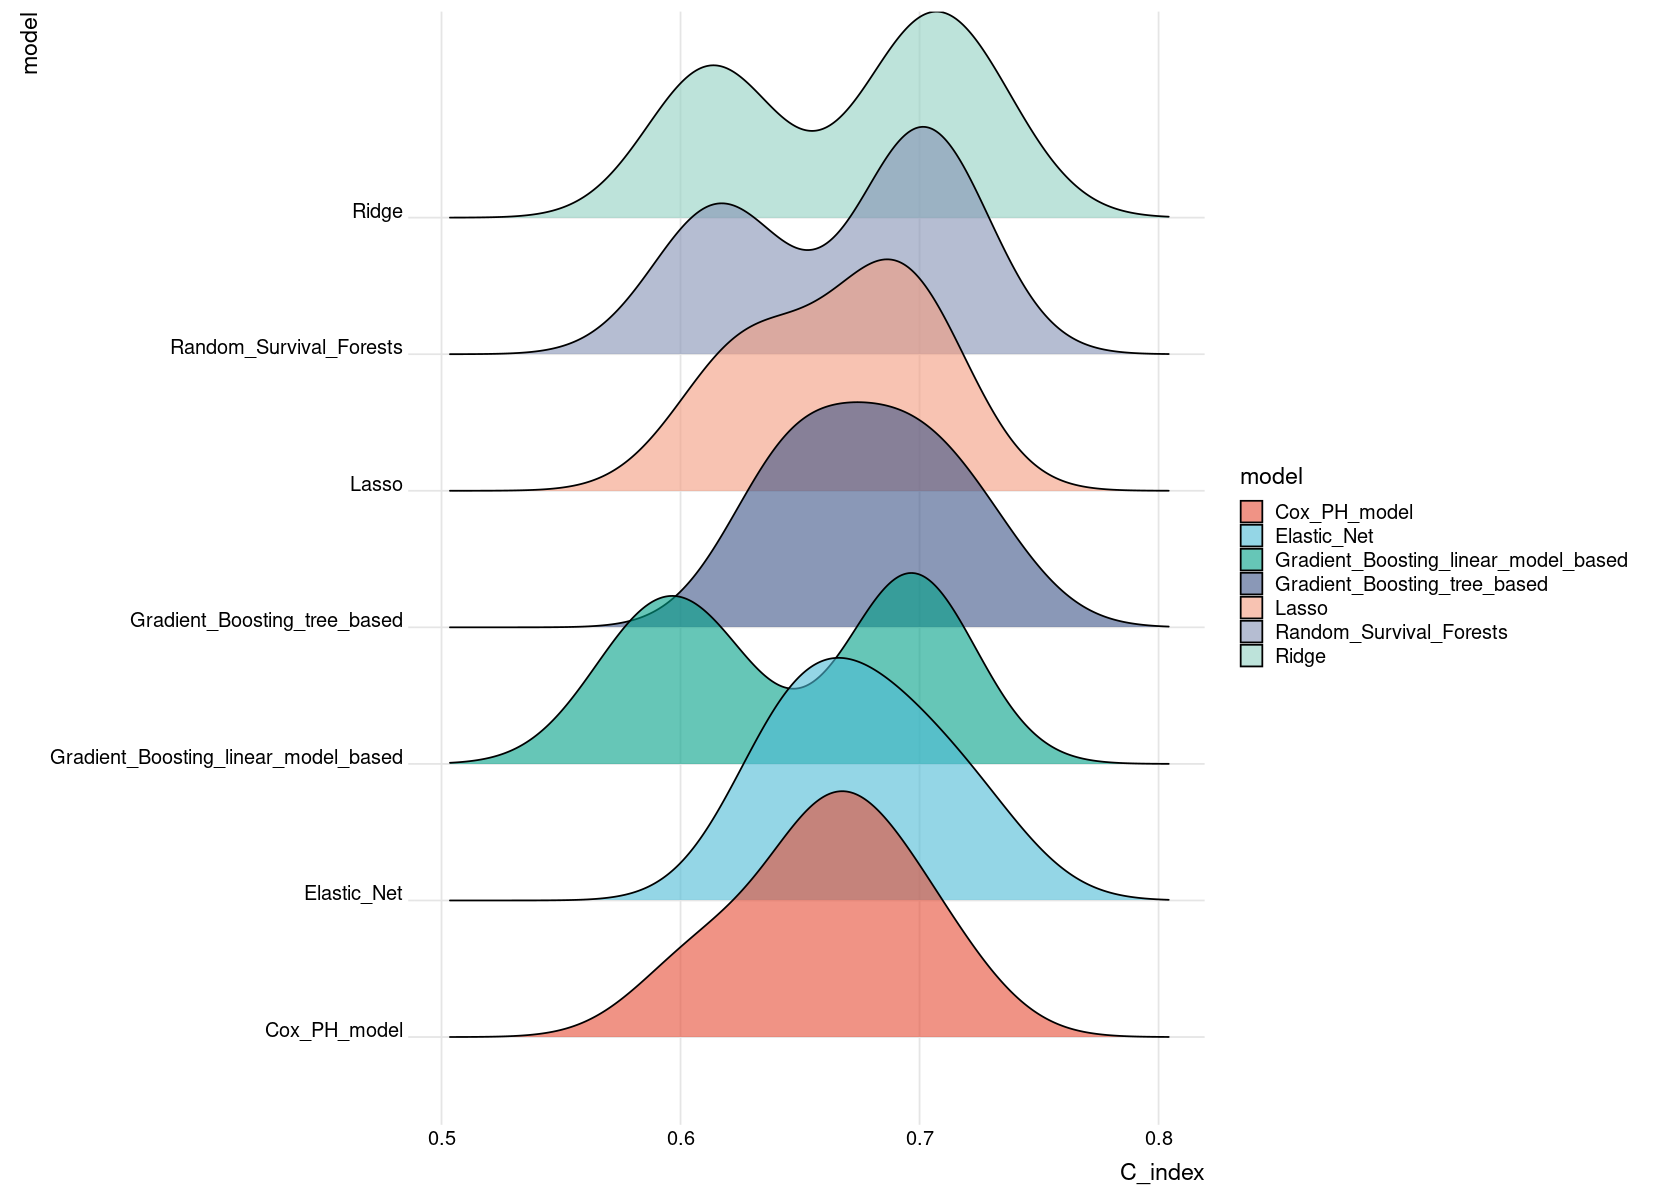

In [89]:
ggplot(c_indices_df, aes(x = C_index, y = model, fill = model)) + 
       geom_density_ridges() +
       #geom_density_ridges(stat = "binline", bins = 10) +
       theme_ridges() + 
       scale_fill_npg(alpha=0.6)

### GSE11121

In [90]:
file_names = list.files(path, pattern = "GSE11121", full.names=TRUE)
file_names_red = list.files(path, pattern = "GSE11121", full.names=FALSE)
mls_mb = read_metalearners_from_file_list(file_names)
length(mls_mb)

[1] 35

In [91]:
c_indices = map(mls_mb, get_c_index)
length(c_indices)

[1] 35

In [92]:
c_indices_df = as.data.frame(unlist(file_names_red))
names(c_indices_df) = c("file_name")
c_indices_df$C_index = as.numeric(c_indices) 

In [93]:
c_indices_df$model = find_models(c_indices_df$file_name)
head(c_indices_df)

,file_name,C_index,model
,<chr>,<dbl>,<chr>
1,ml_GSE11121_Cox_PH_model_mrmr.rds,0.7333168,Cox_PH_model
2,ml_GSE11121_Cox_PH_model_party_cforest_importance.rds,0.6805255,Cox_PH_model
3,ml_GSE11121_Cox_PH_model_randomForestSRC_importance.rds,0.6550915,Cox_PH_model
4,ml_GSE11121_Cox_PH_model_randomForestSRC_var_select_vh.rds,0.6009556,Cox_PH_model
5,ml_GSE11121_Elastic_Net_mrmr.rds,0.7568719,Elastic_Net
6,ml_GSE11121_Elastic_Net_party_cforest_importance.rds,0.6983965,Elastic_Net


Picking joint bandwidth of 0.0273



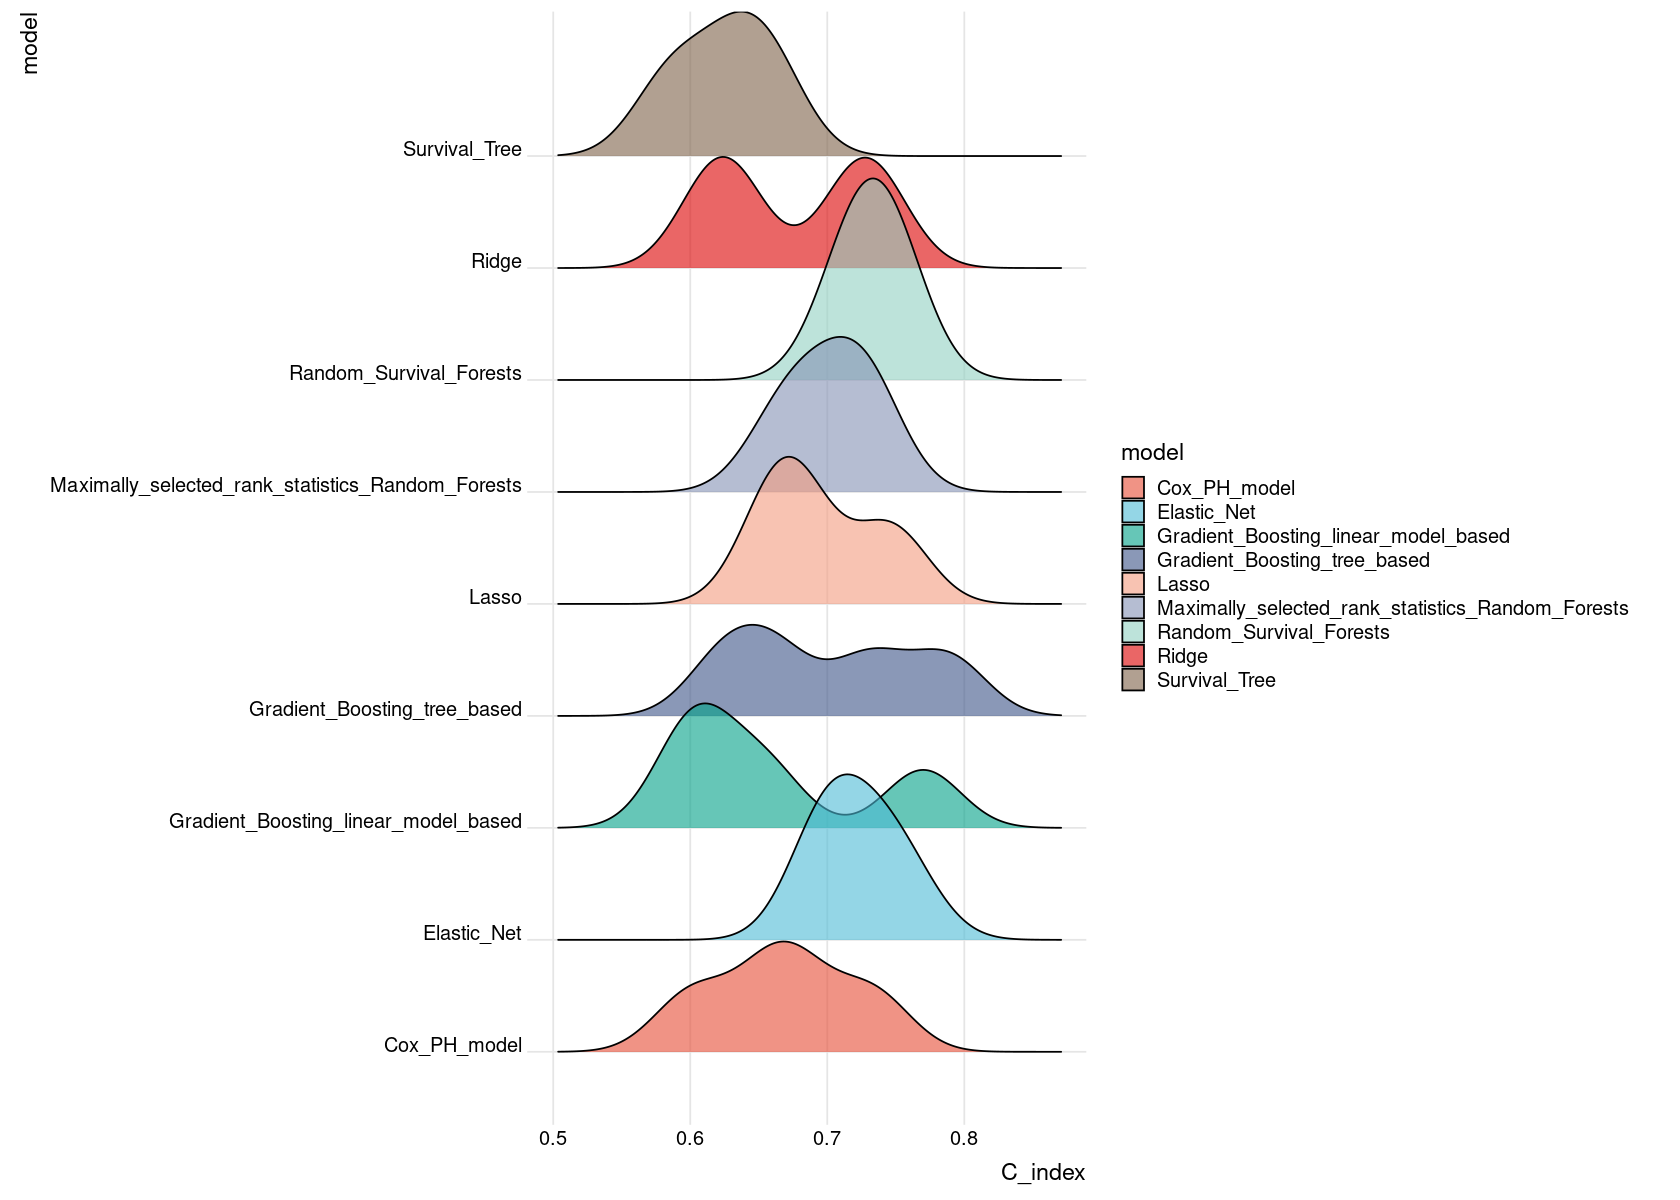

In [94]:
ggplot(c_indices_df, aes(x = C_index, y = model, fill = model)) + 
       geom_density_ridges() +
       #geom_density_ridges(stat = "binline", bins = 10) +
       theme_ridges() + 
       scale_fill_npg(alpha=0.6)

In [99]:
max(c_indices_df$C_index, na.rm=T)

[1] 0.788666

In [100]:
c_indices_df$C_index

[1] 0.7333168 0.6805255 0.6550915 0.6009556 0.7568719 0.6983965 0.7001728
 [8] 0.7306352 0.7700391 0.6110701 0.6556692 0.5973725 0.6636819 0.7886660
[15] 0.6253202 0.7306829 0.6804583 0.7457934       NaN 0.6611607 0.7314771
[22] 0.6902789 0.7214448 0.6646440 0.7416240 0.7513540 0.7126254 0.7262093
[29] 0.6318666 0.7190786 0.7363489 0.6157229 0.5856276 0.6586642 0.6298511